# **Introduction**
We are going to run the exact same experiment like **MNIST**, but this time with the **Fashion MNIST** dataset.

The rules are the same:
* **Input**: 28x28 Grayscale Image
* **Output**: One of 10 categories (T-shirt, Trouser, etc.)

#### **Step 1: Load & Prepare Data**
The data comes from `keras.datasets.fashion_mnist`. We also need to define the `class_names` becuase the data only gives us numbers (0-9), and we need to know that "9" means *"Ankle Boot"*.

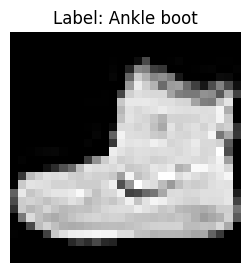

Training Data Shape: (60000, 28, 28)


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# 1. Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Define Label Names (0=T-shirt/top, 1=Trouser, etc.)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 4. Check one image to make sure it loaded correctly
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

print(f"Training Data Shape: {x_train.shape}")

#### **Step 2: Build the Brain**
We will use the **exact same architecture** you used for the digits. This proves that the *structure* of the brain is generic, it's the *weights* that learn the specfic task.

In [8]:
model = keras.Sequential([
    # Input Layer (28x28 pixels)
    keras.Input(shape=(28,28)),

    # Flatten layer (2D > 1D)
    keras.layers.Flatten(),

    # Hidden Layer (128 Neurons, ReLU activation)
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (10 Categories, Softmax probality)
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### **Step 3: Compile & Train**

Now we teach to distinguis a "Sneaker" from a "Sandal"

In [9]:
# 1. Compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 2. Train (5 Epochs)
print("Starting training on Fashion Data...")
history = model.fit(x_train, y_train, epochs=5)

Starting training on Fashion Data...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step - accuracy: 0.8243 - loss: 0.4983
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8646 - loss: 0.3764
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8767 - loss: 0.3362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8846 - loss: 0.3130
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.8896 - loss: 0.2972


**Keep an eye on the accuracy**. For digits, you got ~98%. For clothing, you will likely see it struggle to get past ~88-89%.
* Why? Because a "Shirt" looks a LOT like a "T-shirt" or a "Pullover". The patterns are much harder to separate than clear numbers.

#### **Step 4: Test & Predict**
Let's see if it can identify a random item from the test set that it has never seen before.

313/313 - 0s - 539us/step - accuracy: 0.8709 - loss: 0.3568

Test Accuracy: 0.8709
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


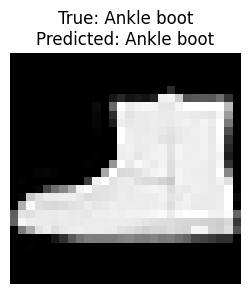

 I am 99.98% sure this is a Ankle boot.


In [10]:
# 1. Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 2. Pick a random image to predict
import random
i = random.randint(0, 10000)
img = x_test[i]
true_label_name = class_names[y_test[i]]

# 3. Make Prediction
prediction = model.predict(img.reshape(1, 28, 28))
predicted_index = np.argmax(prediction)
predicted_label_name = class_names[predicted_index]

# 4. Show Result
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title(f"True: {true_label_name}\nPredicted: {predicted_label_name}")
plt.axis('off')
plt.show()

# 5. Show Confidence
confidence = prediction[0][predicted_index] * 100
print(f" I am {confidence:.2f}% sure this is a {predicted_label_name}.")